Тема “Создание признакового пространства”

Продолжим обработку данных с Твиттера. 

1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'. 
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().
 
2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'.
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().
 
3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы


In [103]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [12]:
with open('transformed_df.pkl', 'rb') as file:
    df = pickle.load(file)

In [13]:
df.head(3)

,id,label,tweet,transformed,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"


In [24]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2), binary=False, analyzer=lambda x:x, max_df = 0.9, 
                                  max_features = 1000, stop_words='english')
# Создаем the Bag-of-Words модель
bow_stemmed = count_vectorizer.fit_transform(df['tweet_stemmed'])

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bow_stemmed.toarray(), columns = feature_names)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yesterday,yet,yo,yoga,york,young,youtub,yoyou,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
bow_lemm = count_vectorizer.fit_transform(df['tweet_lemmatized'])

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bow_lemm.toarray(), columns = feature_names)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,yesterday,yet,yo,yoga,york,young,youtube,yoyou,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), binary=False, analyzer=lambda x:x, max_df = 0.9, 
                                  max_features = 1000, stop_words='english')

In [29]:
bow_tfidf_stemmed = tfidf_vectorizer.fit_transform(df['tweet_stemmed'])

# Отобразим Bag-of-Words модель как DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(bow_tfidf_stemmed.toarray(), columns = feature_names)

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yesterday,yet,yo,yoga,york,young,youtub,yoyou,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
bow_tfidf_lemm = tfidf_vectorizer.fit_transform(df['tweet_lemmatized'])

# Отобразим Bag-of-Words модель как DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(bow_tfidf_lemm.toarray(), columns = feature_names)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,yesterday,yet,yo,yoga,york,young,youtube,yoyou,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
data = open('/home/yana/Загрузки/lesson-2/corpus').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [94]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)


In [98]:
ngram_range = [(1, 1), (1, 2), (1, 3)]
max_df = [0.8, 0.85, 0.9, 0.95, 1]
max_features = [1000, 2000, 5000, 10000, 30000]
result = pd.DataFrame(columns = ['model', 'ngram_range', 'max_df', 'max_features', 'accuracy'])

for a in ngram_range:
    for b in max_df:
        for c in max_features:
            count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words='english', 
                                         ngram_range=a, max_df=b, max_features = c)
            count_vect.fit(trainDF['text'])

            xtrain_count =  count_vect.transform(train_x)
            xvalid_count =  count_vect.transform(valid_x)

            classifier = linear_model.LogisticRegression()
            classifier.fit(xtrain_count, train_y)
            predictions = classifier.predict(xvalid_count)
            result.loc[len(result)] = ['CountVectorizer', a, b, c, accuracy_score(valid_y, predictions)]
            
            tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words='english', 
                                         ngram_range=a, max_df=b, max_features = c)
            tfidf_vect.fit(trainDF['text'])

            xtrain_tfidf =  tfidf_vect.transform(train_x)
            xvalid_tfidf =  tfidf_vect.transform(valid_x)

            classifier.fit(xtrain_tfidf, train_y)
            predictions = classifier.predict(xvalid_tfidf)
            result.loc[len(result)] = ['TfidfVectorizer', a, b, c, accuracy_score(valid_y, predictions)]
            
            

In [99]:
# лучшие результаты
result.sort_values('accuracy', ascending=False).head(5)

,model,ngram_range,max_df,max_features,accuracy
75,TfidfVectorizer,"(1, 2)",0.90,5000,0.8576
135,TfidfVectorizer,"(1, 3)",0.95,5000,0.8576
105,TfidfVectorizer,"(1, 3)",0.80,5000,0.8576
125,TfidfVectorizer,"(1, 3)",0.90,5000,0.8576
85,TfidfVectorizer,"(1, 2)",0.95,5000,0.8576


In [100]:
# худшие результаты
result.sort_values('accuracy').head(5)

,model,ngram_range,max_df,max_features,accuracy
148,CountVectorizer,"(1, 3)",1.0,30000,0.4852
98,CountVectorizer,"(1, 2)",1.0,30000,0.4852
149,TfidfVectorizer,"(1, 3)",1.0,30000,0.5148
42,CountVectorizer,"(1, 1)",1.0,2000,0.5148
43,TfidfVectorizer,"(1, 1)",1.0,2000,0.5148


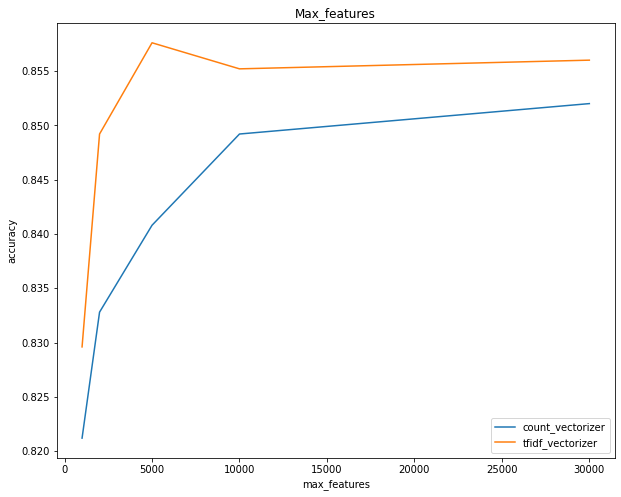

In [109]:
plt.figure(figsize=(10, 8))
data_count = result.loc[(result['model']=='CountVectorizer') & (result.ngram_range ==(1, 2)) & (result.max_df==0.9)].sort_values('max_features')
data_tfidf = result.loc[(result['model']=='TfidfVectorizer') & (result.ngram_range ==(1, 2)) & (result.max_df==0.9)].sort_values('max_features')
plt.plot(data_count['max_features'], data_count['accuracy'], label='count_vectorizer')
plt.plot(data_tfidf['max_features'], data_tfidf['accuracy'], label='tfidf_vectorizer')
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.title('Max_features')
plt.legend()
plt.show()

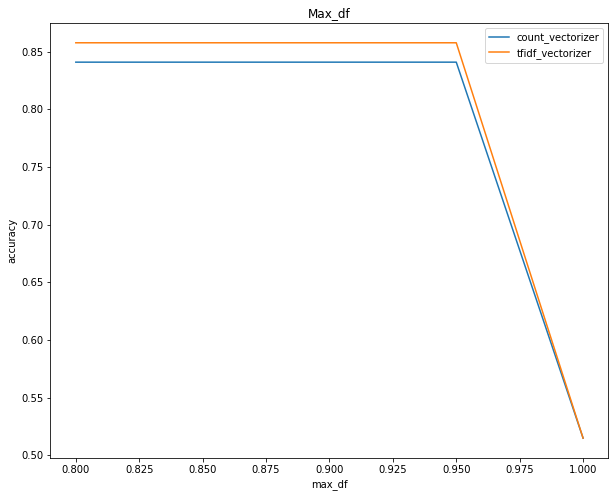

In [111]:
plt.figure(figsize=(10, 8))
data_count = result.loc[(result['model']=='CountVectorizer') & (result.ngram_range ==(1, 2)) & (result.max_features==5000)].sort_values('max_df')
data_tfidf = result.loc[(result['model']=='TfidfVectorizer') & (result.ngram_range ==(1, 2)) & (result.max_features==5000)].sort_values('max_df')
plt.plot(data_count['max_df'], data_count['accuracy'], label='count_vectorizer')
plt.plot(data_tfidf['max_df'], data_tfidf['accuracy'], label='tfidf_vectorizer')
plt.xlabel('max_df')
plt.ylabel('accuracy')
plt.title('Max_df')
plt.legend()
plt.show()

In [114]:
# применим pca к векторайзеру, показавшему лучший результат
components = [50, 100, 300, 500, 1000]
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words='english', 
                                         ngram_range=(1, 2), max_df=0.9, max_features = 5000)
tfidf_vect.fit(trainDF['text'])

xtrain_tfidf =  tfidf_vect.transform(train_x).toarray()
xvalid_tfidf =  tfidf_vect.transform(valid_x).toarray()

for i in components:
    pca = PCA(n_components=i)
    factors_train = pca.fit_transform(xtrain_tfidf)
    factors_val = pca.transform(xvalid_tfidf) 
    
    classifier.fit(factors_train, train_y)
    predictions = classifier.predict(factors_val)
    print(f' {i} components, accuracy = {accuracy_score(valid_y, predictions)}')


 50 components, accuracy = 0.804
 100 components, accuracy = 0.824
 300 components, accuracy = 0.8324
 500 components, accuracy = 0.8416
 1000 components, accuracy = 0.8508


Лучший результат получился с применением TfidfVectorizer. Оптимальное кол-во факторов для tfidf - 5000, кол-во ngram - 1-2 или 1-3. Сильнее всего ухудшает результат параметр max_df=1, при значении max_df от 0.8 до 0.95 результат получился одинаковый. Применение метода pca не помогло улучшить результат.